In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv
/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv')

df2001=df.iloc[0:34]
df2021=df.iloc[700:735]
df2016=df.iloc[520:556]
dfyr=df[['Year','Rape']]
print(dfyr)

     Year  Rape
0    2001   871
1    2001    33
2    2001   817
3    2001   888
4    2001   959
..    ...   ...
731  2021  1250
732  2021   315
733  2021     2
734  2021     0
735  2021     2

[736 rows x 2 columns]


Text(0.5, 1.0, 'Rape Cases by State in India in 2001')

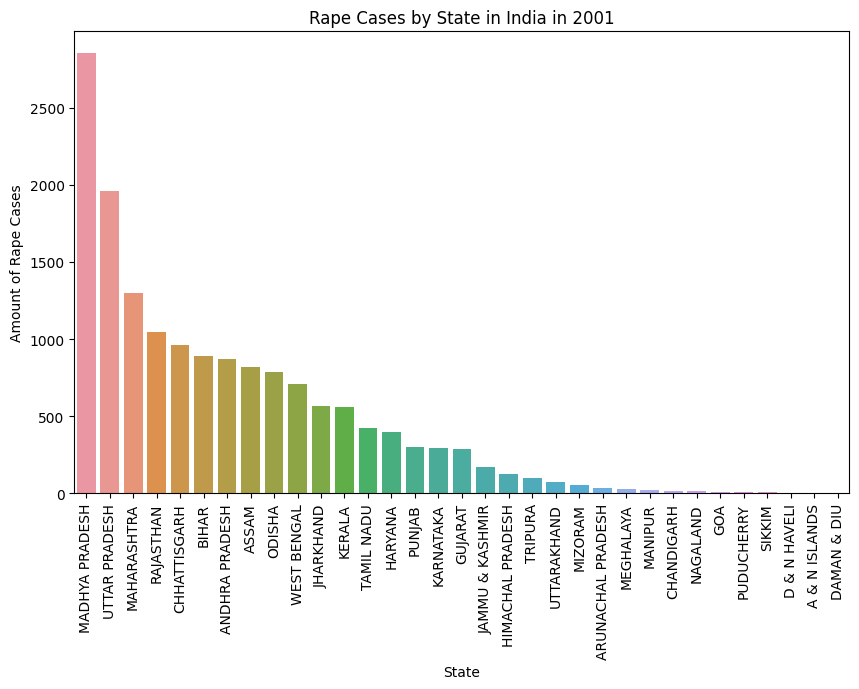

In [3]:
topstates = df2001.sort_values(by='Rape', ascending=False)
topstates = topstates[['State', 'Rape']].head(33)

plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=topstates, x='State', y='Rape')
plt.xticks(rotation=90)
plt.ylabel('Amount of Rape Cases')
plt.title('Rape Cases by State in India in 2001')



Text(0.5, 1.0, 'Rape Cases by State in India in 2021')

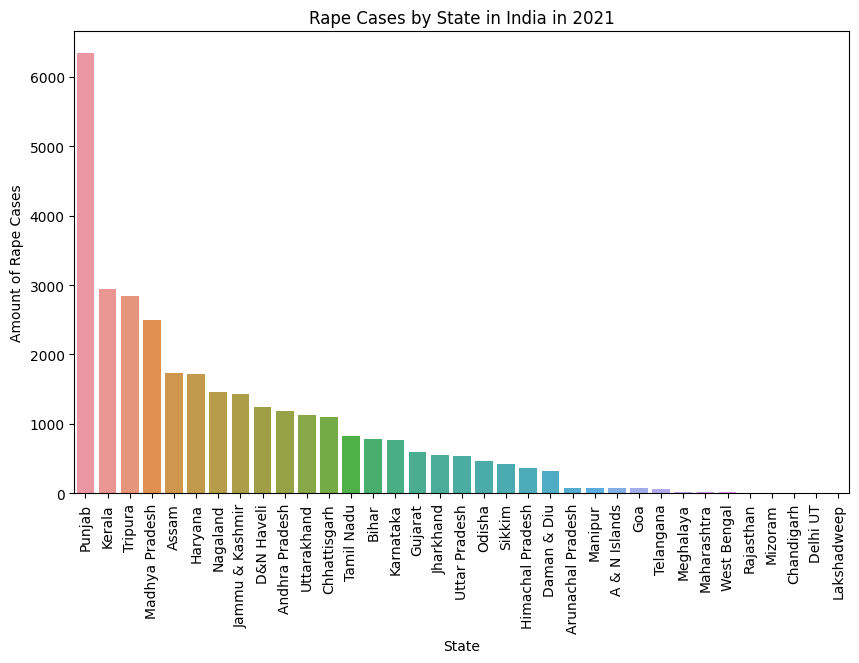

In [4]:
topstates2=df2021.sort_values(by='Rape', ascending=False)
topstates2=topstates2[['State','Rape']]

plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=topstates2, x='State', y='Rape')
plt.xticks(rotation=90)
plt.ylabel('Amount of Rape Cases')
plt.title('Rape Cases by State in India in 2021')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


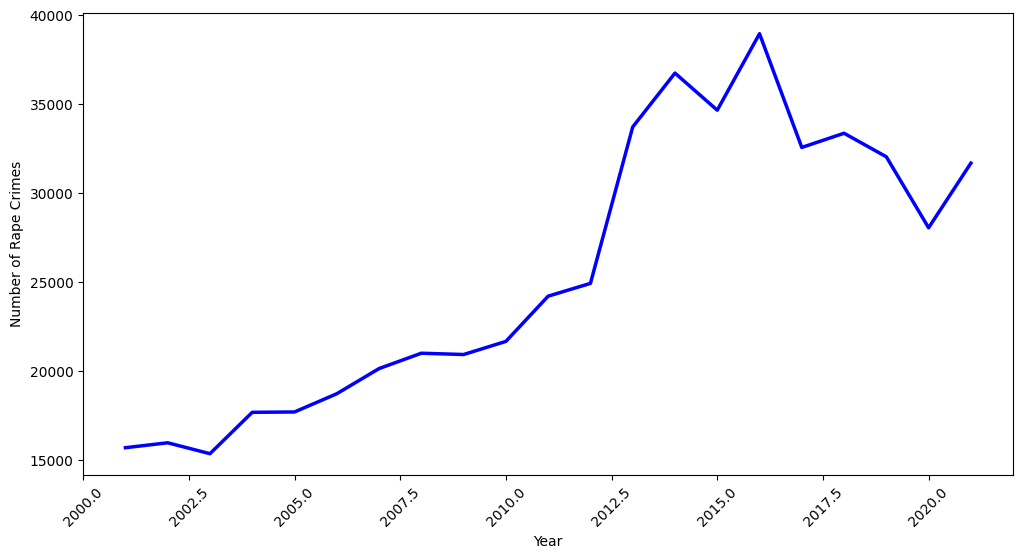

In [5]:
trend=dfyr.groupby("Year")["Rape"].sum().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "Year", y = "Rape",data = trend,color="blue",linewidth = 2.5,dashes = False)
plt.xlabel('Year')
plt.ylabel('Number of Rape Crimes')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Rape Cases by State in India in 2016')

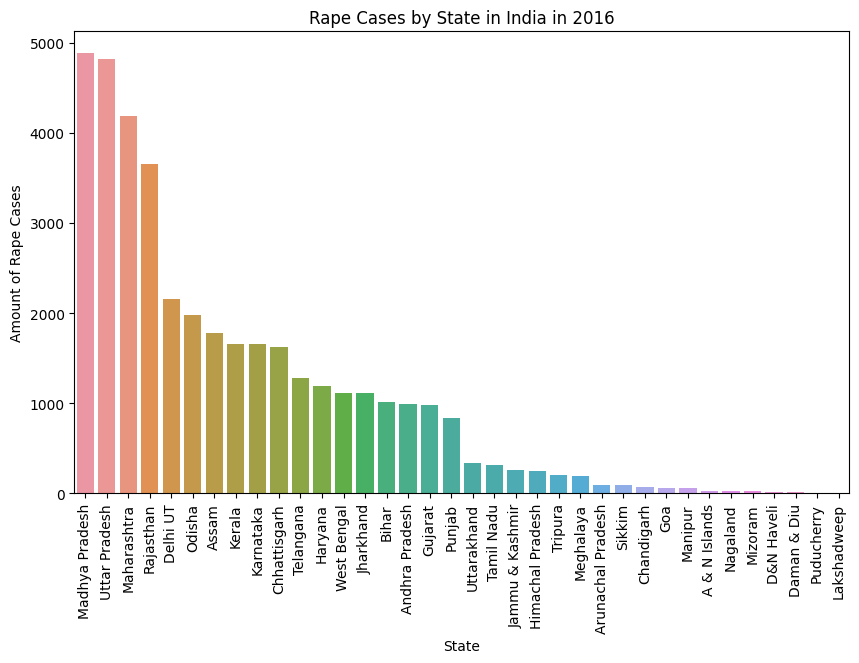

In [6]:
topstates3=df2016.sort_values(by='Rape',ascending=False)
topstates3=topstates3[['State','Rape']]

plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=topstates3, x='State', y='Rape')
plt.xticks(rotation=90)
plt.ylabel('Amount of Rape Cases')
plt.title('Rape Cases by State in India in 2016')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


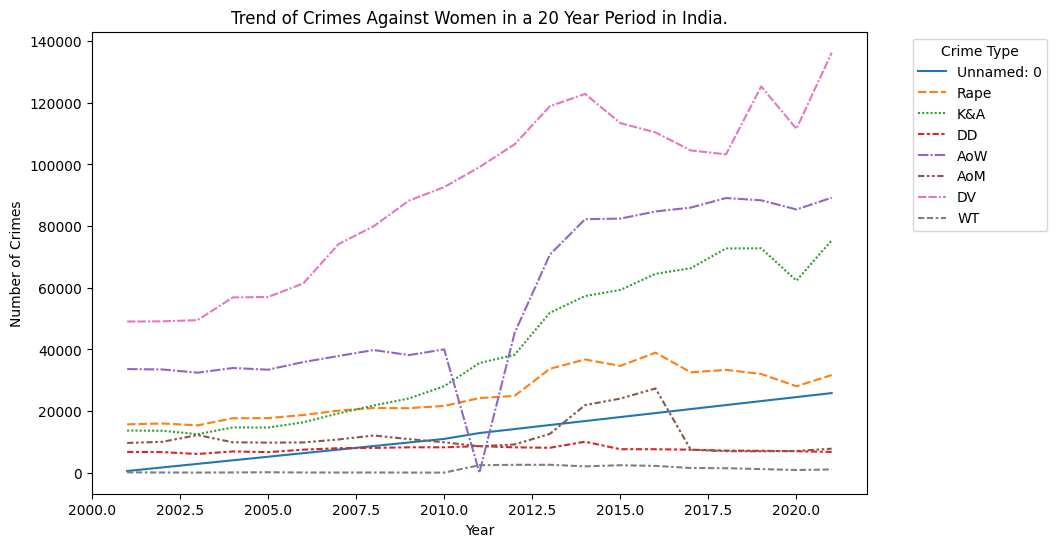

In [7]:
totaltrend = df.groupby('Year').sum()
plt.figure(figsize=(10,6))
sns.lineplot(data=totaltrend)
plt.title('Trend of Crimes Against Women in a 20 Year Period in India.')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1))
plt.show()

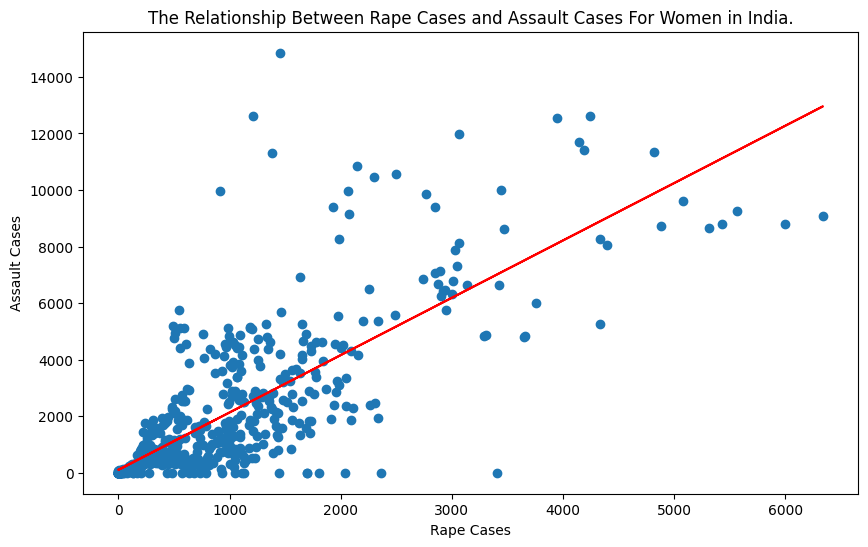

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['Rape'],df['AoW'])
plt.title('The Relationship Between Rape Cases and Assault Cases For Women in India.')
plt.xlabel('Rape Cases')
plt.ylabel('Assault Cases')
z = np.polyfit(df['Rape'], df['AoW'], 1)
p = np.poly1d(z)

plt.plot(df['Rape'], p(df['Rape']), color='red', label="Trend line")


plt.show()